Если будете подключать и тестить, то мои файлы лежат в папке files  - относительно данного файла

Необходимые импорты! Собрала их все вместе для простоты. У кого новое окружение необходимо выполнить в терминале

**pip install pandas numpy scikit-learn**

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt



## Шаг №1 Общий сбор информации о датасете с выводами 

In [23]:
pd.set_option('display.max_columns', None)  # Показать все столбцы
pd.set_option('display.width', 1900)        # Установить ширину области отображения

In [24]:
# Загрузка данных
data = pd.read_csv('files/train.csv') # Обратите внимание на путь файла

# Просмотр первых строк
print(data.head())

   id Product ID Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF
0   0     L50096    L                300.6                    309.6                    1596         36.1              140                0    0    0    0    0    0
1   1     M20343    M                302.6                    312.1                    1759         29.1              200                0    0    0    0    0    0
2   2     L49454    L                299.3                    308.5                    1805         26.5               25                0    0    0    0    0    0
3   3     L53355    L                301.0                    310.9                    1524         44.3              197                0    0    0    0    0    0
4   4     M24050    M                298.0                    309.0                    1641         35.4               34                0    0    0    0    0    0


In [25]:
# Получение общей информации о данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Проверка уникальных значений в столбцах типа object
- **Цель:**
  - Проверить, какие уникальные значения содержатся в столбцах с типом `object` (`Product ID` и `Type`), чтобы понять их структуру.
- **Задачи:**
  - Убедиться, что данные в столбце `Type` корректны (например, нет ошибок в написании).
  - Определить, можно ли удалить `Product ID` (например, если это уникальные значения, которые не несут полезной информации для анализа).


### Описание столбцов:
- **id**: Идентификатор записи
- **Product ID**: Идентификатор продукта
- **Type**: Тип оборудования (L, M, H)
- **Air temperature [K]**: Температура воздуха (в Кельвинах)
- **Process temperature [K]**: Температура процесса (в Кельвинах)
- **Rotational speed [rpm]**: Скорость вращения (об/мин)
- **Torque [Nm]**: Крутящий момент (Н·м)
- **Tool wear [min]**: Износ инструмента (минуты)
- **Machine failure**: Отказ оборудования *(Целевая переменная)*
- **Tool Wear Failure [TWF]**: Отказ из-за износа инструмента
- **Heat Dissipation Failure [HDF]**: Отказ из-за проблем с охлаждением
- **Power Failure [PWF]**: Отказ из-за проблем с подачей электроэнергии
- **Overstrain Failure [OSF]**: Отказ из-за перенапряжения
- **Random Failure [RNF]**: Случайный отказ


In [26]:
print("Уникальные значения в 'Product ID':", data['Product ID'].nunique())
print("Уникальные значения в 'Type':", data['Type'].unique())

Уникальные значения в 'Product ID': 9976
Уникальные значения в 'Type': ['L' 'M' 'H']


Как и ожидалось, Столбец `Product ID` можно исключить, он используется только для идентификации продукта и не имеет отношения к анализу или предсказанию. 

**Пока оставлю, просто помечу для себя!**

Столбец `Type` - категориальный! Будем его перекодировать по методу One-Hot Encoding (создание трёх отдельных столбцов для каждой категории). На шаге Трансформация.

In [27]:
# Проверка пропущенных значений
print(data.isnull().sum())

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


**Вывод:** Еще раз убедилась что пропущенных значений в нашем наборе данных нет. 

Это хороший знак, так как это упрощает процесс обработки данных — не нужно будет заполнять или удалять пропуски.

In [28]:
# Статистика по числовым столбцам
print(data.describe())

                  id  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]    Torque [Nm]  Tool wear [min]  Machine failure            TWF            HDF            PWF            OSF            RNF
count  136429.000000        136429.000000            136429.000000           136429.000000  136429.000000    136429.000000    136429.000000  136429.000000  136429.000000  136429.000000  136429.000000  136429.000000
mean    68214.000000           299.862776               309.941070             1520.331110      40.348643       104.408901         0.015744       0.001554       0.005160       0.002397       0.003958       0.002258
std     39383.804275             1.862247                 1.385173              138.736632       8.502229        63.965040         0.124486       0.039389       0.071649       0.048899       0.062789       0.047461
min         0.000000           295.300000               305.800000             1181.000000       3.800000         0.000000         0.000000 

### Вывод:
Данные сбалансированы по большинству параметров, кроме целевой переменной (`Machine failure`) и связанных с ней причин отказов.

#### Отдельные наблюдения:
— Минимальные значения `Torque` и `Tool wear` требуют проверки — это может быть связано с аномалиями или особыми условиями.  
— `Rotational speed` имеет максимальное значение, которое может быть выбросом.


In [29]:
# Наша целевая переменная
print(data['Machine failure'].value_counts())

# Подсчёт количества значений в целевой переменной
counts = data['Machine failure'].value_counts()

# Извлечение количества классов 0 и 1
count_0 = counts[0]  # Количество строк с меткой 0
count_1 = counts[1]  # Количество строк с меткой 1

# Расчёт соотношения
ratio = count_0 / count_1
print(f"Соотношение 0 к 1: {ratio:.2f}")

Machine failure
0    134281
1      2148
Name: count, dtype: int64
Соотношение 0 к 1: 62.51


### Вывод:
- **0**: Отказа не произошло  
- **1**: Произошёл отказ оборудования  

Это означает, что на **1 отказ оборудования** приходится примерно **62 нормальных случаев**.  
Данные сильно несбалансированы, и это нужно учитывать при построении моделей.


In [30]:
print("Количество дубликатов:", data.duplicated().sum())

Количество дубликатов: 0


Очистка дубликатов не потребуется!

#### Код очистки дубликатов (на всякий случай):
```python
print("\nДубликаты:", data.duplicated().sum())
data = data.drop_duplicates()


## Шаг №2 Очистка данных

Проверим, есть ли выбросы (аномальные значения)

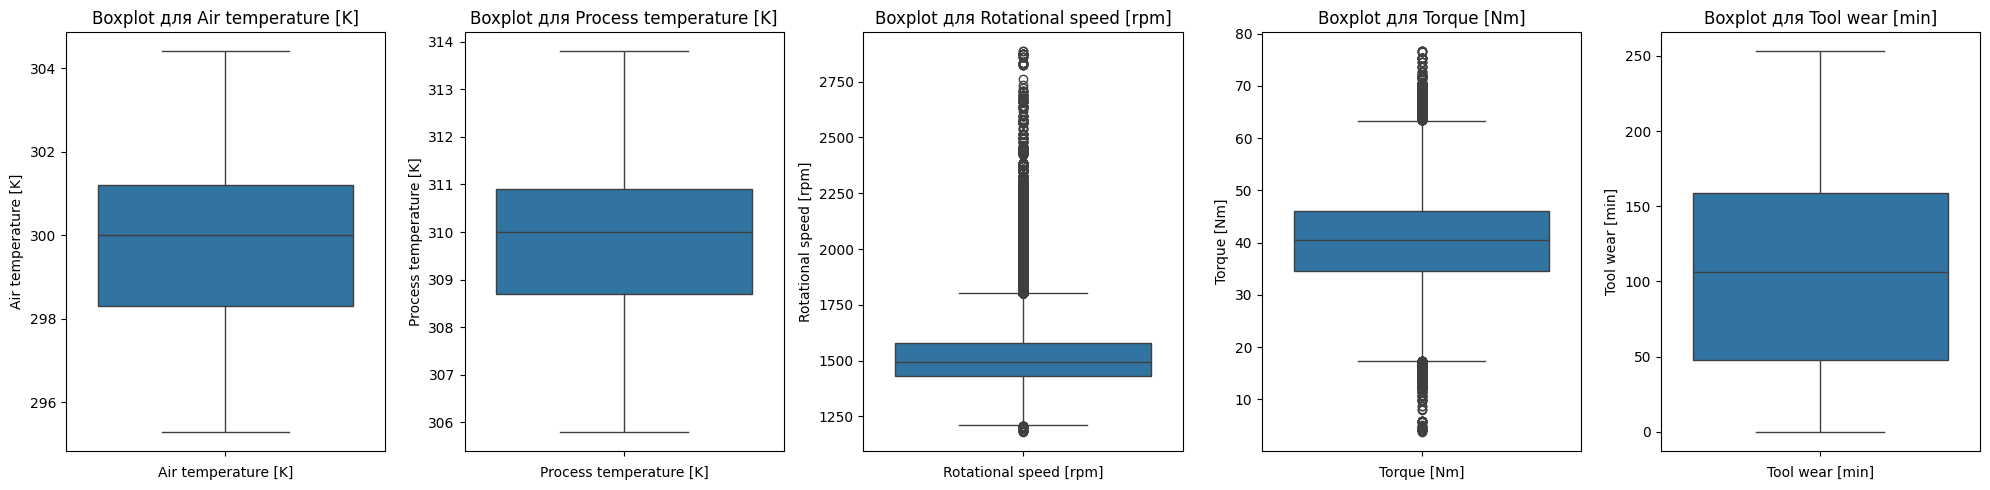

In [31]:
numeric_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Создание сетки графиков
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(20, 5))  # 1 строка, N столбцов

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(data[col], ax=ax)
    ax.set_title(f'Boxplot для {col}')
    ax.set_xlabel(col)

plt.tight_layout()  # Для аккуратного расположения графиков
plt.show()

**Вывод:** Столбцы (`Rotational speed [rpm]`, `Torque [Nm]`) имеют выбросы, как видно из графиков. Их нужно нормализовать.

In [32]:
print(data[['Torque [Nm]', 'Rotational speed [rpm]']].head(5))

   Torque [Nm]  Rotational speed [rpm]
0         36.1                    1596
1         29.1                    1759
2         26.5                    1805
3         44.3                    1524
4         35.4                    1641


In [33]:
col = 'Torque [Nm]'  # столбец, для которого ищем выбросы

Q1 = data[col].quantile(0.25)  # Первый квартиль
Q3 = data[col].quantile(0.75)  # Третий квартиль
IQR = Q3 - Q1  # Межквартильный размах

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Выбросы для {col}:")
selected_columns = ['id', col, 'Machine failure']  # Укажите столбцы, которые хотите вывести
print(data[selected_columns][(data[col] < lower_bound) | (data[col] > upper_bound)].head(5))

# Как выбросы Torque [Nm] влияют на целевую переменную?
print(data[(data[col] < lower_bound) | (data[col] > upper_bound)]['Machine failure'].value_counts())

Выбросы для Torque [Nm]:
      id  Torque [Nm]  Machine failure
237  237         63.7                0
382  382         15.8                0
395  395         64.0                0
471  471         65.3                0
745  745         67.1                1
Machine failure
0    718
1    342
Name: count, dtype: int64


### Вывод:
Это говорит о том, что выбросы `Torque [Nm]` связаны как с отказами оборудования, так и с нормальной работой.


In [34]:
col = 'Rotational speed [rpm]'  # столбец, для которого ищем выбросы

Q1 = data[col].quantile(0.25)  # Первый квартиль
Q3 = data[col].quantile(0.75)  # Третий квартиль
IQR = Q3 - Q1  # Межквартильный размах

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Выбросы для {col}:")
selected_columns = ['id', col, 'Machine failure']  # Укажите столбцы, которые хотите вывести
print(data[selected_columns][(data[col] < lower_bound) | (data[col] > upper_bound)].head(5))

# Как выбросы Rotational speed [rpm] влияют на целевую переменную?
print(data[(data[col] < lower_bound) | (data[col] > upper_bound)]['Machine failure'].value_counts())

Выбросы для Rotational speed [rpm]:
      id  Rotational speed [rpm]  Machine failure
2      2                    1805                0
73    73                    1805                0
94    94                    1816                0
103  103                    2099                0
147  147                    1858                0
Machine failure
0    5018
1     141
Name: count, dtype: int64


### Вывод:
Это количество совпадает с распределением всей метки `Machine failure`.  
Это означает, что все строки с выбросами имеют то же распределение отказов, что и весь датасет.


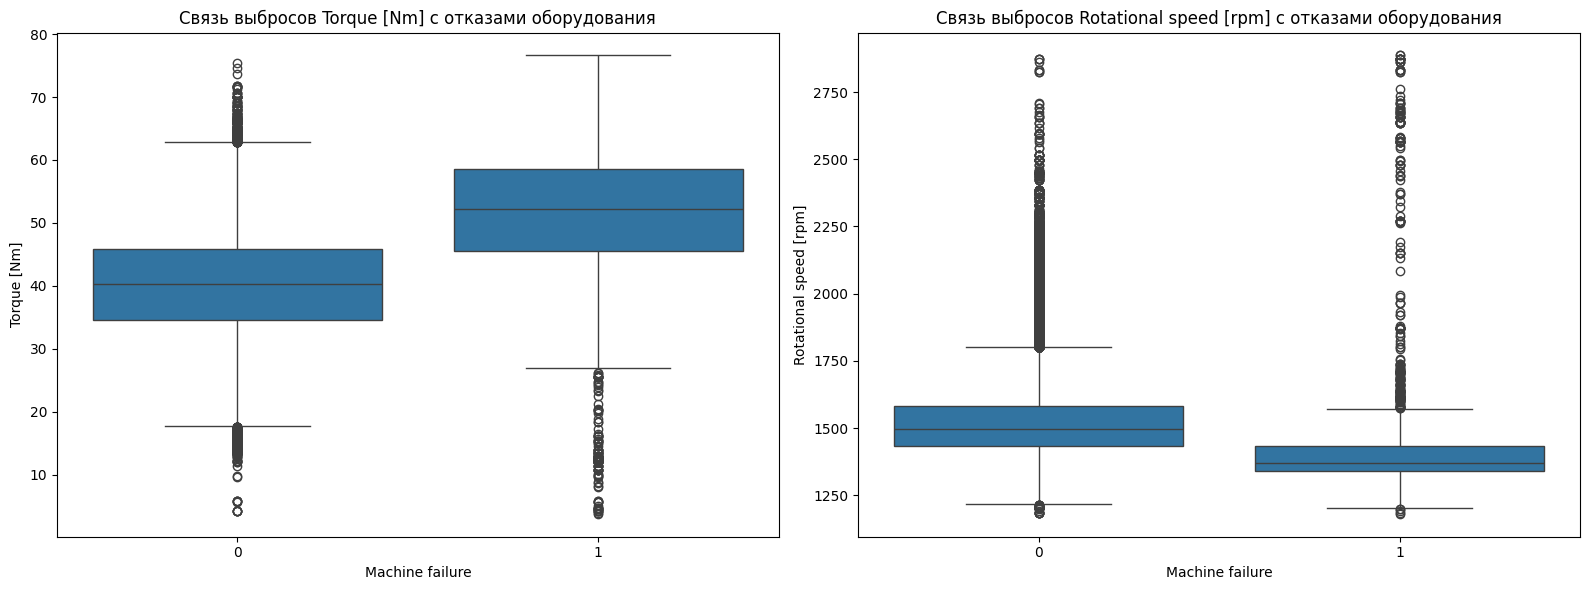

In [35]:
# Создание сетки графиков
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 строка, 2 столбца

# Boxplot для Torque [Nm]
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=data, ax=axes[0])
axes[0].set_title('Связь выбросов Torque [Nm] с отказами оборудования')

# Boxplot для Rotational speed [rpm]
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=data, ax=axes[1])
axes[1].set_title('Связь выбросов Rotational speed [rpm] с отказами оборудования')

# Компактное расположение
plt.tight_layout()
plt.show()

### Описание метода `clip`:
Метод `clip` изменяет значения в указанном столбце (`numeric_columns`), чтобы они находились в пределах заданных границ.

#### Параметры:
- **`lower=lower_bound`**: Минимальное значение, ниже которого данные будут приведены к этому значению.
- **`upper=upper_bound`**: Максимальное значение, выше которого данные будут приведены к этому значению.


In [36]:
numeric_columns = ['Torque [Nm]', 'Rotational speed [rpm]']

# Применение clip для каждого столбца
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Применение clip для текущего столбца
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
# print(data[['Torque [Nm]', 'Rotational speed [rpm]']].head(5))

### Проверка изменений

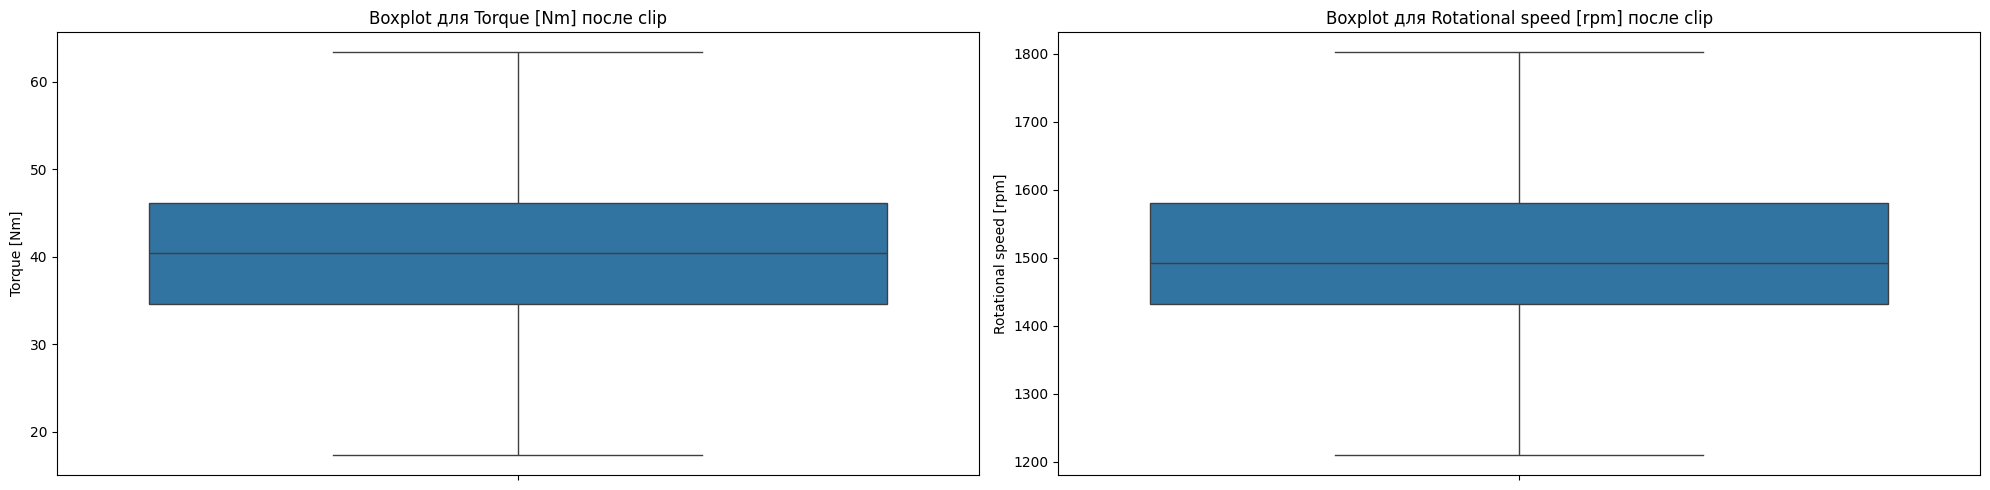

In [37]:
# Создание сетки для графиков
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(20, 5))  # 1 строка, N столбцов

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(data[col], ax=ax)
    ax.set_title(f'Boxplot для {col} после clip')

# Компактное расположение графиков
plt.tight_layout()
plt.show()


### Вывод:
Данные мы не удалили, так как они могут быть полезны в обучении модели, но ограничили выбросы диапазоном. Это видно на графиках.


## Шаг 3: Трансформация данных (Data Transformation)

In [38]:
# Удаление столбца Product ID (он не информативен)
data = data.drop(columns=['Product ID'])

In [39]:
# One-Hot Encoding (для нейтральных категорий)
data = pd.get_dummies(data, columns=['Type'])
print(data.head())

   id  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  Type_H  Type_L  Type_M
0   0                300.6                    309.6                    1596         36.1              140                0    0    0    0    0    0   False    True   False
1   1                302.6                    312.1                    1759         29.1              200                0    0    0    0    0    0   False   False    True
2   2                299.3                    308.5                    1802         26.5               25                0    0    0    0    0    0   False    True   False
3   3                301.0                    310.9                    1524         44.3              197                0    0    0    0    0    0   False    True   False
4   4                298.0                    309.0                    1641         35.4               34                0    0    0    0   

### Вывод после кодирования:
После кодирования появились три новых столбца: 
- **`Type_L`**: Значение `True` соответствует `1`, значение `False` соответствует `0`.
- **`Type_M`**: Значение `True` соответствует `1`, значение `False` соответствует `0`.
- **`Type_H`**: Значение `True` соответствует `1`, значение `False` соответствует `0`.


In [40]:
# print(data.info())

### Интерпретация столбцов:
Есть непонятные столбцы. Данная интерпретация ВОЗМОЖНАЯ!!! Я не ручаюсь, что правильно подобрала расшифровку. В описании датасета не нашла информации.

- **`TWF` (Tool Wear Failure)**: Указывает, произошёл ли отказ из-за износа инструмента.
  - **0**: Отказ не связан с износом инструмента.
  - **1**: Отказ из-за износа инструмента.

- **`HDF` (Heat Dissipation Failure)**: Отказ, вызванный проблемами с охлаждением или рассеиванием тепла.
  - **0**: Отказ не связан с перегревом.
  - **1**: Отказ из-за перегрева.

- **`PWF` (Power Failure)**: Отказ из-за проблем с подачей электроэнергии.
  - **0**: Отказ не связан с питанием.
  - **1**: Отказ из-за проблем с питанием.

- **`OSF` (Overstrain Failure)**: Отказ, вызванный перенапряжением (например, превышением допустимых нагрузок).
  - **0**: Отказ не связан с перенапряжением.
  - **1**: Отказ из-за перенапряжения.

- **`RNF` (Random Failure)**: Случайный отказ (не связанный с другими указанными причинами).
  - **0**: Нет случайного отказа.
  - **1**: Произошёл случайный отказ.


In [41]:
# Переименование столбцов для удобства
data = data.rename(columns={
    'TWF': 'Tool Wear Failure [TWF]',
    'HDF': 'Heat Dissipation Failure [HDF]',
    'PWF': 'Power Failure [PWF]',
    'OSF': 'Overstrain Failure [OSF]',
    'RNF': 'Random Failure [RNF]'
})

# Проверка названий столбцов
# print(data.columns)

In [42]:
# Сохранение предобработанных данных
# data.info()
data.to_csv('processed_train.csv', sep=';', index=False) # Обратите внимание на разделитесь!
print("Предобработка завершена. Данные сохранены в 'processed_train.csv'.")

Предобработка завершена. Данные сохранены в 'processed_train.csv'.
